# Get count of GOBP terms associated with each Ensembl ID / Uniprot ID pair

### Requirements

```
pip install bioservices
pip install -U scikit-learn
```

In [4]:
from gobp import *

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [6]:
df = pd.read_csv("top1000pairs_corr_positive.ver2.tsv", delimiter="\t", header=None)
df.columns=['Ensembl_ID', 'Corr', 'GOBP']

In [7]:
df['Ensembl_ID'].to_list()[:10]

["('ENSG00000001629', 'ENSG00000140718')",
 "('ENSG00000001629', 'ENSG00000110075')",
 "('ENSG00000002016', 'ENSG00000179532')",
 "('ENSG00000004534', 'ENSG00000115464')",
 "('ENSG00000001629', 'ENSG00000077254')",
 "('ENSG00000001629', 'ENSG00000036549')",
 "('ENSG00000001629', 'ENSG00000197323')",
 "('ENSG00000001629', 'ENSG00000122741')",
 "('ENSG00000001629', 'ENSG00000138081')",
 "('ENSG00000001629', 'ENSG00000186153')"]

In [8]:
def get_unique_ensembl_ids(df, colname='Ensembl_ID'):
    
    genes = []
    column_list = df[colname].to_list()
    for item in column_list:
        pair = item.strip("()'").split(", ")
        genes.extend([pair[0].strip("'"), pair[1].strip("'")])
    
    # Remove duplicates
    unique_genes = list(set(genes))
    
    return unique_genes

In [9]:
ens_ids = get_unique_ensembl_ids(df)

In [10]:
uniprot_ids = []
for id in ens_ids:
    uniprot_id = ensembl_id_to_uniprot_id(id)
    #print(uniprot_id)
    ens_uni = id + "_" + uniprot_id
    uniprot_ids.append(ens_uni)

In [11]:
assert len(uniprot_ids) == len(ens_ids)

In [14]:
uniprot_ids

['ENSG00000183475_H0YMJ1',
 'ENSG00000196663_O15040',
 'ENSG00000204618_Q96QB5',
 'ENSG00000114062_A0A1B0GVL3',
 'ENSG00000025770_E5RJN3',
 'ENSG00000112367_A0A6Q8PF27',
 'ENSG00000176715_H0YH37',
 'ENSG00000153339_J3QSA1',
 'ENSG00000112996_Q9NP92',
 'ENSG00000133103_H0YGX8',
 'ENSG00000143621_X6R6Z1',
 'ENSG00000101040_Q9ULU4',
 'ENSG00000006607_H7C447',
 'ENSG00000003096_Q9P2N7',
 'ENSG00000144468_C9JAS2',
 'ENSG00000163131_A0A7P0T8A1',
 'ENSG00000077312_P09012',
 'ENSG00000196151_Q8N9V3',
 'ENSG00000007392_Q9NQ29',
 'ENSG00000142687_A0A8V8TM29',
 'ENSG00000006831_Q86V24',
 'ENSG00000166508_C9J8M6',
 'ENSG00000004534_C9J250',
 'ENSG00000263761_Q9UK05',
 'ENSG00000197081_A0A7I2V657',
 'ENSG00000173482_Q49AC9',
 'ENSG00000100029_B2RDF2',
 'ENSG00000146021_D6RH21',
 'ENSG00000006695_J3KSJ3',
 'ENSG00000144231_E9PHV4',
 'ENSG00000135624_F8WBP8',
 'ENSG00000198556_F8WEN0',
 'ENSG00000204482_O00453',
 'ENSG00000185278_Q5TC79',
 'ENSG00000142082_E9PIT6',
 'ENSG00000072756_A0A8V8TN57',
 'EN

In [12]:
uniprot_ids[:10]

['ENSG00000183475_H0YMJ1',
 'ENSG00000196663_O15040',
 'ENSG00000204618_Q96QB5',
 'ENSG00000114062_A0A1B0GVL3',
 'ENSG00000025770_E5RJN3',
 'ENSG00000112367_A0A6Q8PF27',
 'ENSG00000176715_H0YH37',
 'ENSG00000153339_J3QSA1',
 'ENSG00000112996_Q9NP92',
 'ENSG00000133103_H0YGX8']

In [15]:
def create_count_dict(ids) -> dict:
    unidict=dict()
    for id in ids:
        print(id)
        uniprot_id = id.split("_")[1]
        gobp=get_gene_go_terms(uniprot_id)
        print(gobp)
        #counts = get_term_gene_counts(gobp)
        #print(counts)
        counts = len(gobp)
        unidict[id]=counts

    return unidict

In [16]:
%%capture
counts = create_count_dict(uniprot_ids)

In [17]:
counts

{'ENSG00000183475_H0YMJ1': 2,
 'ENSG00000196663_O15040': 3,
 'ENSG00000204618_Q96QB5': 0,
 'ENSG00000114062_A0A1B0GVL3': 4,
 'ENSG00000025770_E5RJN3': 1,
 'ENSG00000112367_A0A6Q8PF27': 3,
 'ENSG00000176715_H0YH37': 0,
 'ENSG00000153339_J3QSA1': 0,
 'ENSG00000112996_Q9NP92': 3,
 'ENSG00000133103_H0YGX8': 2,
 'ENSG00000143621_X6R6Z1': 0,
 'ENSG00000101040_Q9ULU4': 15,
 'ENSG00000006607_H7C447': 0,
 'ENSG00000003096_Q9P2N7': 6,
 'ENSG00000144468_C9JAS2': 0,
 'ENSG00000163131_A0A7P0T8A1': 1,
 'ENSG00000077312_P09012': 6,
 'ENSG00000196151_Q8N9V3': 1,
 'ENSG00000007392_Q9NQ29': 3,
 'ENSG00000142687_A0A8V8TM29': 0,
 'ENSG00000006831_Q86V24': 12,
 'ENSG00000166508_C9J8M6': 3,
 'ENSG00000004534_C9J250': 0,
 'ENSG00000263761_Q9UK05': 44,
 'ENSG00000197081_A0A7I2V657': 0,
 'ENSG00000173482_Q49AC9': 0,
 'ENSG00000100029_B2RDF2': 5,
 'ENSG00000146021_D6RH21': 1,
 'ENSG00000006695_J3KSJ3': 0,
 'ENSG00000144231_E9PHV4': 1,
 'ENSG00000135624_F8WBP8': 1,
 'ENSG00000198556_F8WEN0': 1,
 'ENSG00000204482

In [18]:
ids=[]; gobp_counts=[]
for k, v in counts.items():
    ids.append(k)
    gobp_counts.append(v)
df = pd.DataFrame()
df['Ensembl_Uniprot']=ids
df['GOBP_Counts']=gobp_counts

In [23]:
df = df[df['GOBP_Counts']>0]

In [25]:
# after dropping zero
df

,Ensembl_Uniprot,GOBP_Counts
0,ENSG00000183475_H0YMJ1,2
1,ENSG00000196663_O15040,3
3,ENSG00000114062_A0A1B0GVL3,4
4,ENSG00000025770_E5RJN3,1
5,ENSG00000112367_A0A6Q8PF27,3
...,...,...
446,ENSG00000083067_H7BYP1,6
447,ENSG00000002016_F5GX32,6
449,ENSG00000095787_Q9BTA9,9
450,ENSG00000006704_Q9UHL9,4


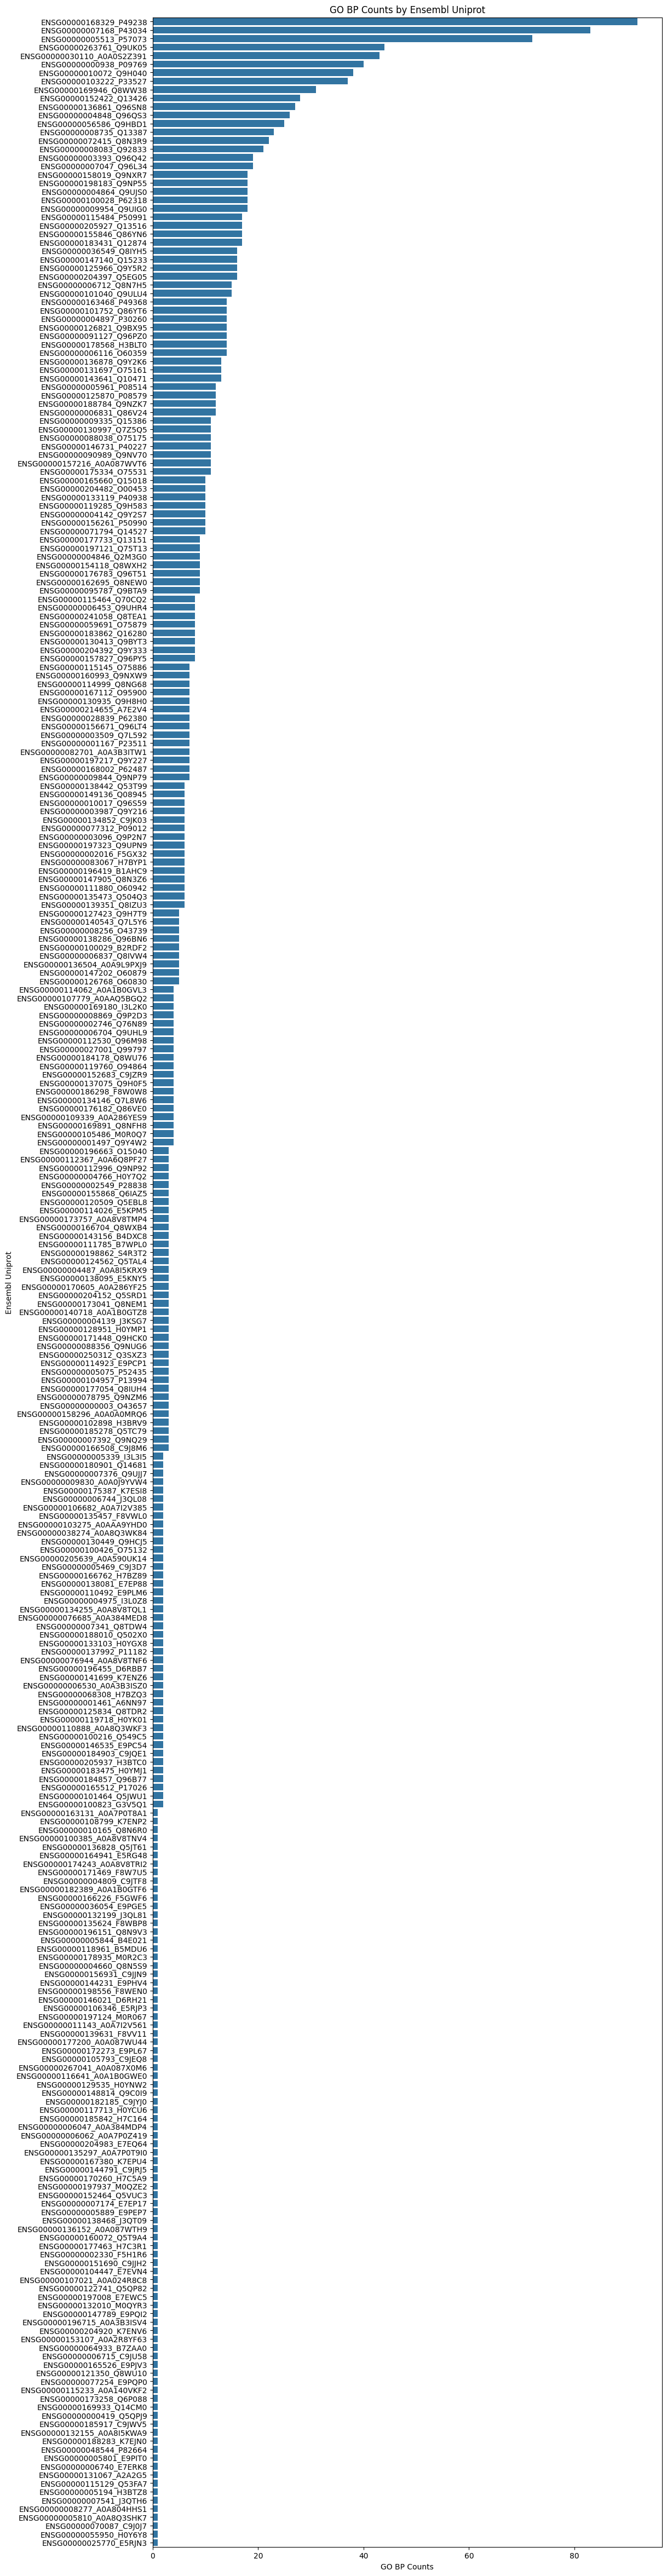

In [33]:
# Sort the DataFrame by 'gobp_counts' in descending order
df_sorted = df.sort_values(by='GOBP_Counts', ascending=False)

# Plot the barplot
plt.figure(figsize=(12, 60))
sns.barplot(data=df_sorted, x='GOBP_Counts', y='Ensembl_Uniprot')

# Set plot labels
plt.xlabel("GO BP Counts")
plt.ylabel("Ensembl Uniprot")
plt.title("GO BP Counts by Ensembl Uniprot")

plt.show()

In [34]:
df_sorted

,Ensembl_Uniprot,GOBP_Counts
212,ENSG00000168329_P49238,92
291,ENSG00000007168_P43034,83
126,ENSG00000005513_P57073,72
23,ENSG00000263761_Q9UK05,44
224,ENSG00000030110_A0A0S2Z391,43
...,...,...
365,ENSG00000008277_A0A804HHS1,1
363,ENSG00000005810_A0A8Q3SHK7,1
362,ENSG00000070087_C9J0J7,1
388,ENSG00000055950_H0Y6Y8,1
